In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')[['Age','Pclass','Fare','Survived']]
print(f"{np.round(df.isna().mean(), 4)*100}")
df.head()

Age         19.87
Pclass       0.00
Fare         0.00
Survived     0.00
dtype: float64


,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


In [3]:

X = df.drop(columns=['Survived'])
y = df[['Survived']]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)



### **Using KNN Imputer**

In [4]:
knn = KNNImputer(n_neighbors=3, weights='distance')

X_train_trf = pd.DataFrame(knn.fit_transform(X_train), columns=X.columns)
X_test_trf = pd.DataFrame(knn.transform(X_test), columns=X.columns)


X_train_trf.sample(5)

,Age,Pclass,Fare
103,30.000000,3.0,7.2500
239,31.000000,3.0,24.1500
532,28.000000,3.0,7.8958
286,19.415808,3.0,7.7292
510,25.000000,3.0,7.9250


In [5]:
reg = LogisticRegression()
reg.fit(X_train_trf, y_train)
y_test_pred = reg.predict(X_test_trf)

print(f"{np.round(accuracy_score(y_test, y_test_pred), 4)*100} %")


70.39 %


### **Using Simple Imputer**

In [6]:
si = SimpleImputer()

X_train_trf2 = pd.DataFrame(si.fit_transform(X_train), columns=X.columns)
X_test_trf2 = pd.DataFrame(si.transform(X_test), columns=X.columns)

X_train_trf2.sample(5)


,Age,Pclass,Fare
207,34.000000,2.0,13.0000
12,18.000000,3.0,7.8542
441,29.785904,3.0,7.7375
96,41.000000,3.0,39.6875
272,24.000000,3.0,24.1500


In [8]:
reg = LogisticRegression()

reg.fit(X_train_trf, y_train)
y_test_pred2 = reg.predict(X_test_trf2)

print(f"{np.round(accuracy_score(y_test, y_test_pred2), 4)*100} %")


69.83 %


#### **Plotting graphs for both the imputers**

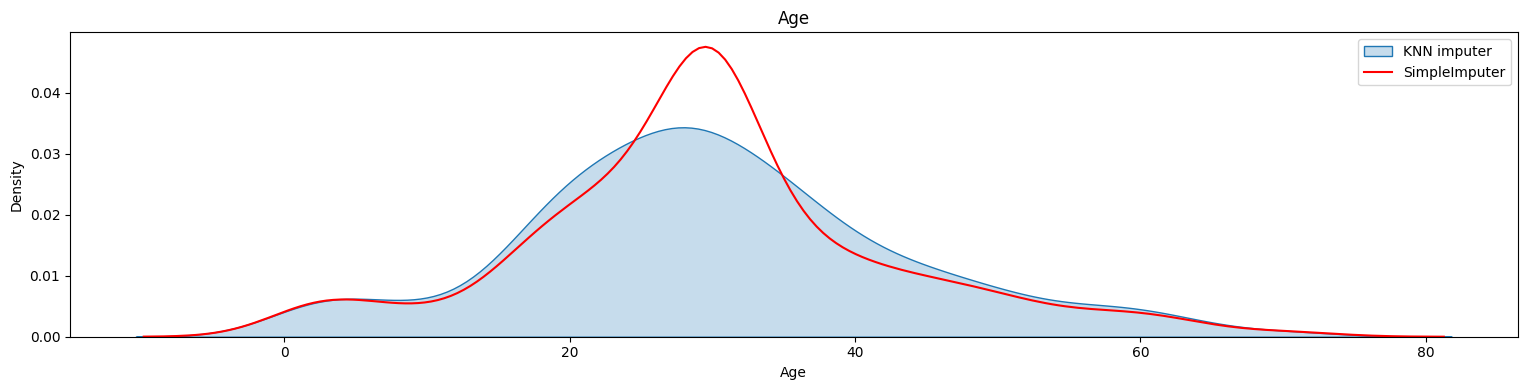

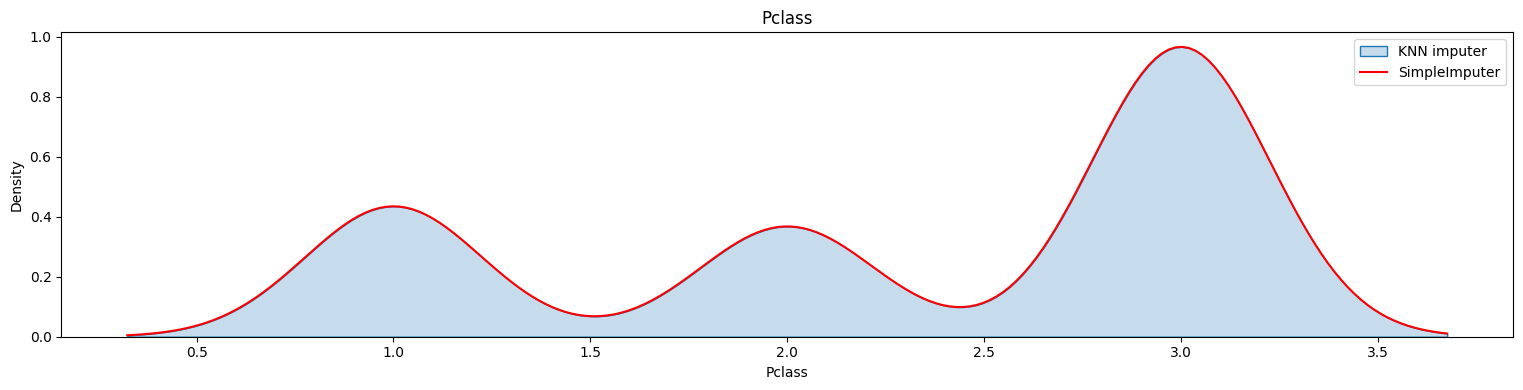

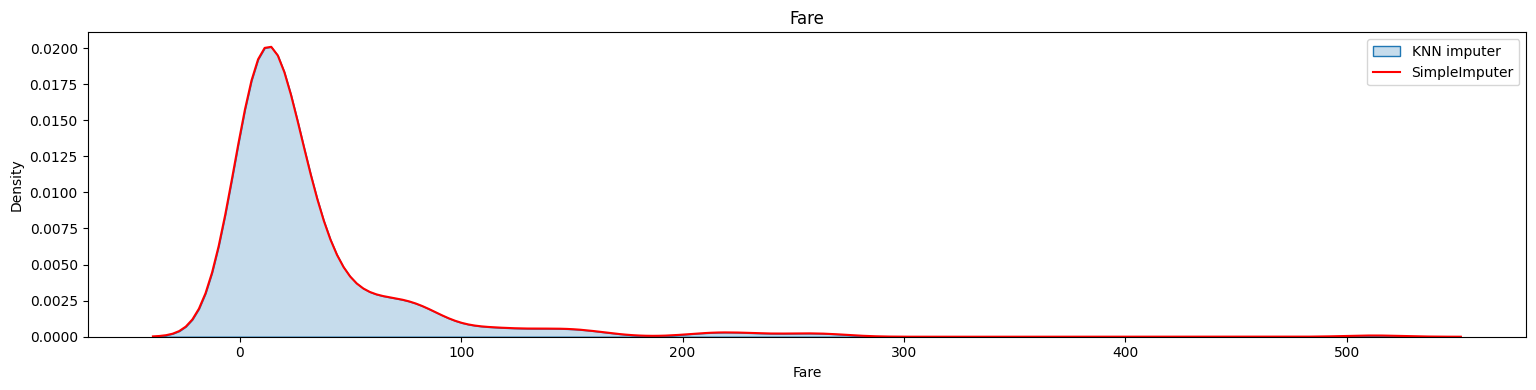

In [ ]:
for col in X.columns:
    plt.figure(figsize=(30, 4))

    plt.subplot(121)
    sns.kdeplot(X_train_trf[col], fill=True, label='KNN imputer')
    sns.kdeplot(X_train_trf2[col], color='red', label='SimpleImputer')
    plt.legend()

    plt.title(col)
    plt.tight_layout()
    plt.show()

    # as you can see in Age while applying KNN imputer we get more smooth distribution, but in case of SimpleImputer(mean) we get more of a step function.